In [1]:
import numpy as np
import pandas as pd

from solver import SolverFactory

import matplotlib.pyplot as plt
import seaborn as sns

#### Compare Classical Gram-schmidts vs Modified Gram-schmidts vs Householder

We define orthogonality error as $||Q^*Q - I||$

In [2]:
def orthogonality_error(q: np.ndarray):
    return np.linalg.norm(q.T @ q - np.eye(N=q.shape[0]))


Now we check orthogonality error for random 10000 4 by 4 vector

/home/rogga/.local/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


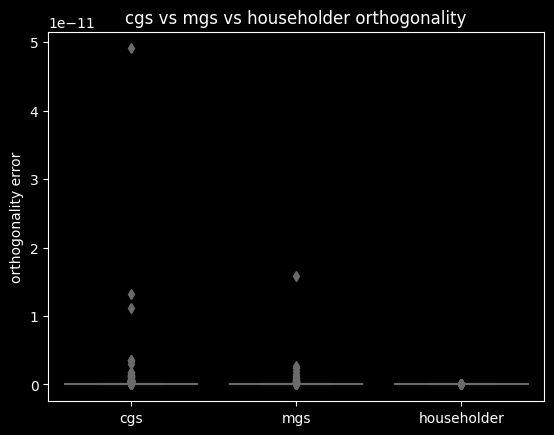

In [3]:
solver_names = ['cgs', 'mgs', 'householder']
As = np.random.rand(10000, 4, 4)
results = pd.DataFrame(columns = solver_names)

for solver_name in solver_names:
    solver = SolverFactory.create_solver(solver_name) # factory pattern
    errors = []
    for A in As:
        q, _ = solver.solve(A)
        error = orthogonality_error(q)
        errors.append(error)
    results[solver_name] = errors

sns.boxplot(results)

plt.ylabel('orthogonality error')
plt.title(f'{" vs ".join(solver_names)} orthogonality')
plt.show()

from box plot, there are some outliers especially in cgs and mgs.

To see each case, we draw lineplot

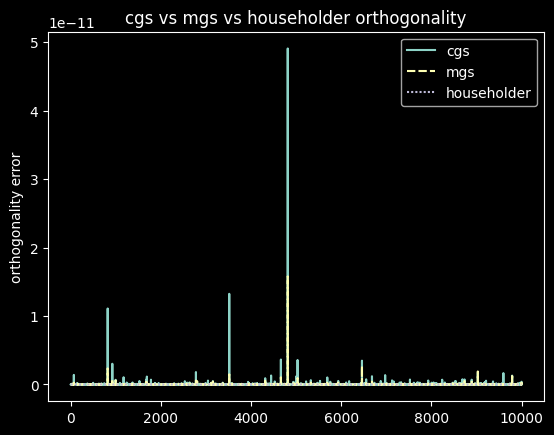

In [6]:
sns.lineplot(results)

plt.ylabel('orthogonality error')
plt.title(f'{" vs ".join(solver_names)} orthogonality')
plt.show()

#### CGS vs MGS
cgs and mgs have some outliers at some vectors. We will dig into it specifically

In [8]:
def orthogonality_error_matrix(q: np.ndarray):
    return q.T @ q - np.eye(N=q.shape[0])


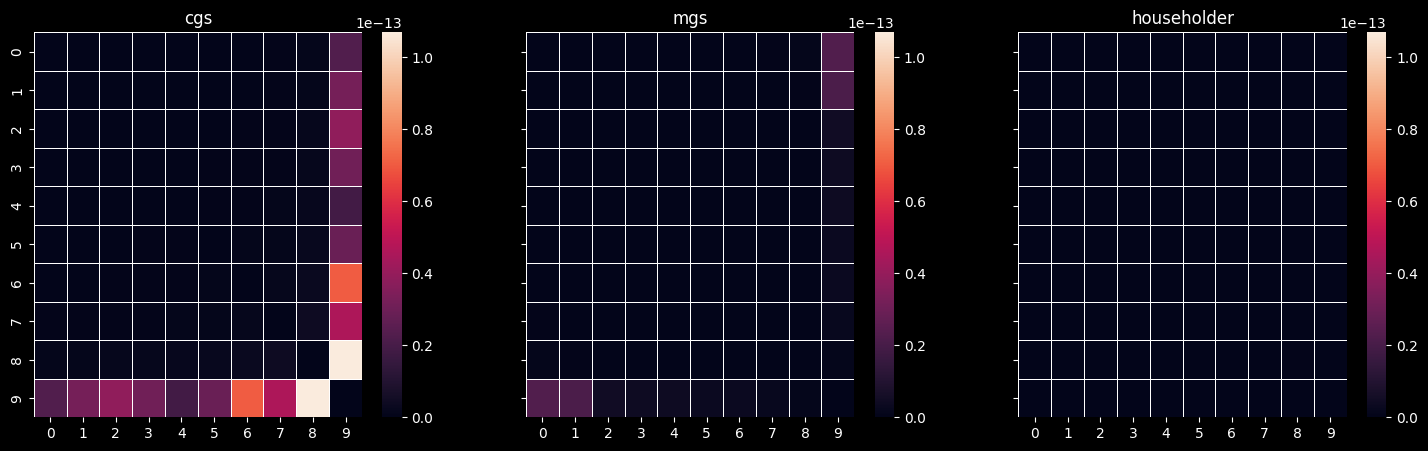

In [24]:

m = 10
n = 10
solver_names = ['cgs', 'mgs', 'householder']
errors = np.zeros(shape=(len(solver_names), m, n))
As = np.random.rand(10000, m, n)

for i, solver_name in enumerate(solver_names):
    solver = SolverFactory.create_solver(solver_name) # factory pattern
    for A in As:
        if np.linalg.det(A) == 0: # A must be full rank
            continue
        q, _ = solver.solve(A)
        error = orthogonality_error_matrix(q)
        errors[i] += np.abs(error)

errors /= As.shape[0] # average

fig, axs = plt.subplots(1, len(solver_names), sharey=True, figsize=(18, 5))
# fig.title('cgs vs mgs vs householder orthogonality')
for i, ax in enumerate(axs):
    ax.set_title(solver_names[i])
    sns.heatmap(errors[i], linewidth=0.5, ax = ax, vmin=0, vmax=np.max(errors))

plt.show()


Error at cgs 8, 9 is biggest i.e. error of $Q_i^* Q_j$ is biggest at $(i, j) = (8, 9)$

Both cgs and mgs propagates error from start to end, but cgs have more error at the end. We can proof this with simple 3 by 3 qr decomposition

- [https://math.stackexchange.com/questions/3913710/intuitive-explanation-of-why-the-modified-gram-schmidt-is-more-stable-than-the-c](https://math.stackexchange.com/questions/3913710/intuitive-explanation-of-why-the-modified-gram-schmidt-is-more-stable-than-the-c)
- [https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.htm](https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html)

간략한 설명

$$
Q=(q_1|q_2|q_3)
\\q_1^Tq_2 = \delta
\\v_3\text{ is the final form of the third vector (before normalization).}

$$

1) classical gram schmidt

$$
q_1^Tv_3 = -(q_2^Tx_3)\delta
\\q_2^Tv_3 = -(q_1^Tx_3)\delta
$$

2) modified gram schmidt

$$
q_1^Tv_3 = -(q_2^Tx_3)\delta + (q_1^Tx_3)\delta^2
\\q_2^Tv_3 = 0
$$

Since $\delta$ is very small, $\delta^2$ is much smaller. And so the error in $q_1^Tv_3$ is no worse than in CGS, but we've eliminated the errors in $q_2^Tv_3$, an improvement.

#### GS vs Householder
tbd...